In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('images/kek.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

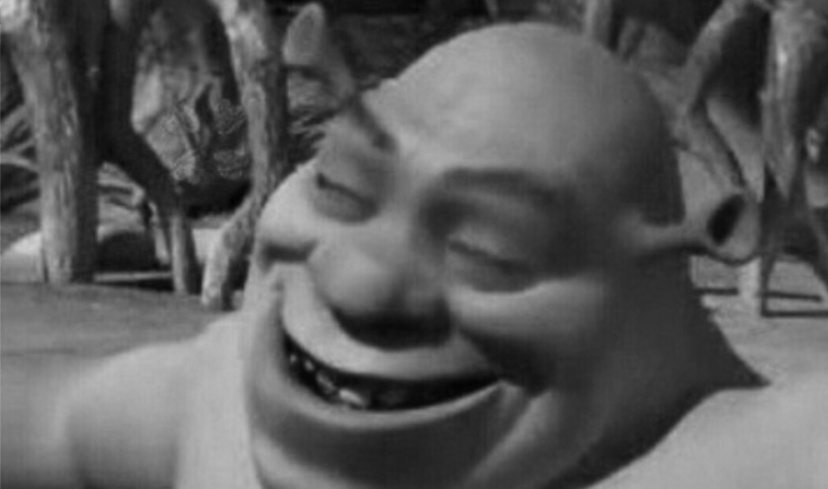

In [3]:
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow('img', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

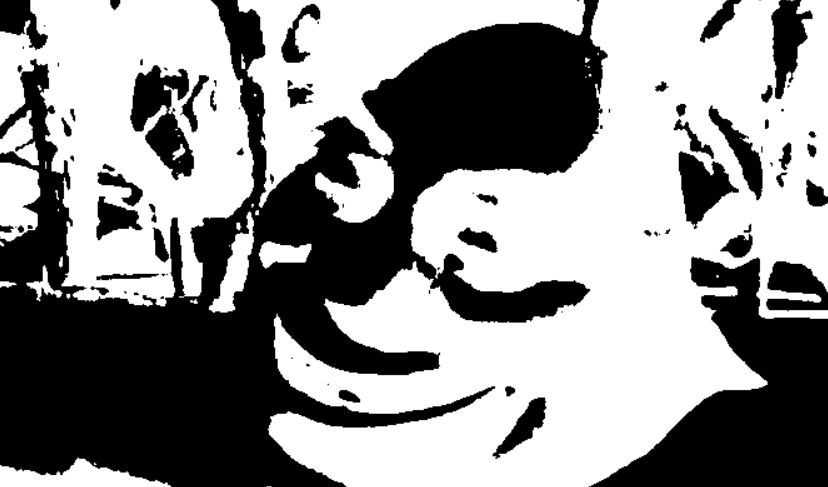

In [4]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_contours_point = []
for i in range(len(contours)):
    max_contours_point.append((contours[i], len(contours[i]), hierarchy[0][i]))
biggest_cont = sorted(max_contours_point,key=lambda x: x[1], reverse= True)
cnt = biggest_cont[0][0]
hierar = biggest_cont[0][2]
img_contoured = cv2.drawContours(img.copy(), [cnt], -1, (0,255,0), 3,cv2.LINE_8)
cv2.imshow('img', img_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

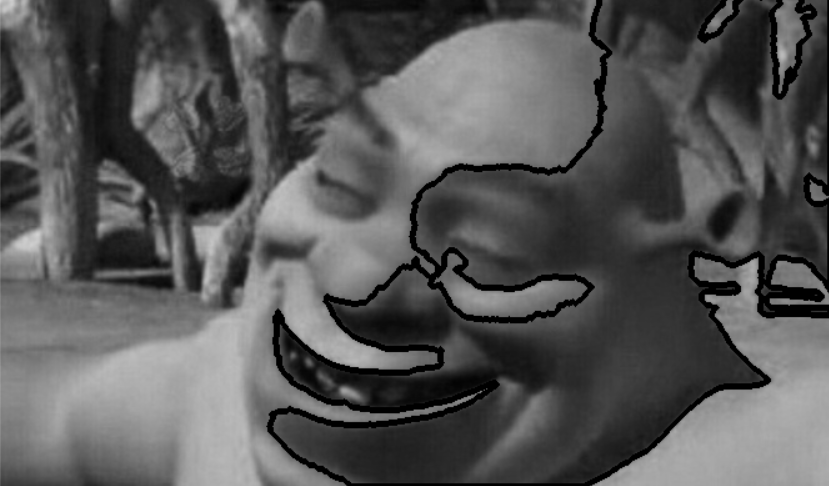

# Centroid

In [5]:
# calculate moments of binary image
M = cv2.moments(thresh)
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
# put text and highlight the center
cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img_contoured, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (1, 1, 1), 2)
# display the image
cv2.imshow("Image", img_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

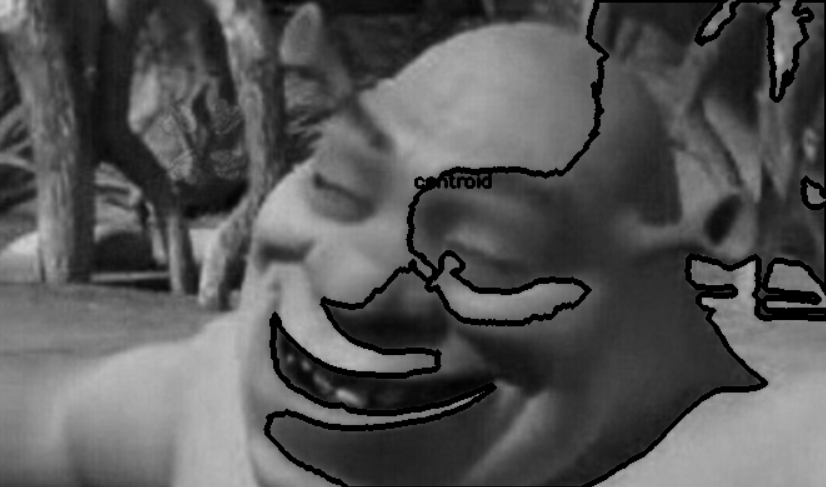

# Perimeter

In [6]:
perimeter = cv2.arcLength(cnt,True)
print(f'perimeter = {perimeter}')

perimeter = 3531.176959991455


# Fourier descriptor

In [7]:
cnt_complex = list(map(complex, cnt[:,0,0], cnt[:,0,1]))
a = np.fft.fft(cnt_complex,norm="forward")
a_buf=a
percent=0.01; #percent of descriptors in 0 to 1

for i in range(round(len(cnt_complex)*(percent/2)),round(len(cnt_complex)*(1-percent/2))):
    a_buf[i]=0

S = np.fft.ifft(a_buf,norm="forward")
cropped_cnt =[]
for elem in S:
    cropped_cnt.append(np.array([[elem.real,elem.imag]], dtype=np.int32))
cropped_cnt = np.array(cropped_cnt)

img_contoured_S = cv2.drawContours(img.copy(), [np.array(cropped_cnt)], -1, (0,255,0), 2, cv2.LINE_AA)
cv2.imshow('img', img_contoured_S)
cv2.waitKey(0)
cv2.destroyAllWindows()

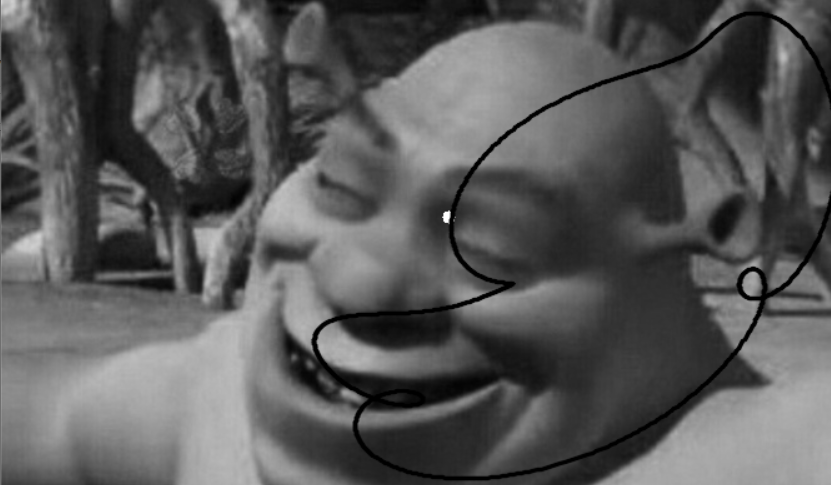